In [1]:
# Preprocesamiento de datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

In [2]:
# Lectura de imágenes
parent_dir_path = 'D:\\Radar Zaragoza\Original'
images = {}

start = 87100 -1500
end = 88600 -1500
i = 0

for filename in os.listdir(parent_dir_path):
    if (i >= start):
        file_path = os.path.join(parent_dir_path, filename)
        if os.path.isfile(file_path):
            image = plt.imread(file_path)
            images[filename] = image
        
    if (i >= end):
        break
    i = i + 1

(530, 480, 4)


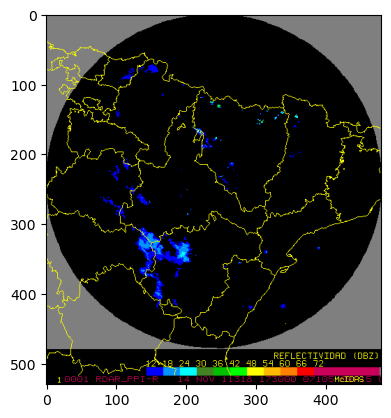

In [3]:
print(images[list(images.keys())[0]].shape)
plt.imshow(images[list(images.keys())[0]])

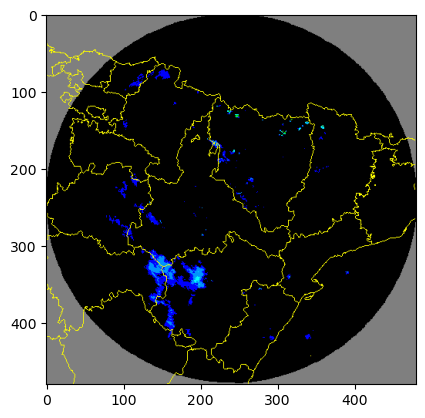

In [4]:
# recorte del borde inferior
coordenada_corte = 480

keys = list(images.keys())

for key in keys:
    images[key] = images[key][:coordenada_corte]
    
plt.imshow(images[keys[0]])

In [5]:
# mask = (images[keys[0]].reshape([-1, 4]) == pixel_externo).prod(axis = 1)
# meh = images[keys[0]].reshape([-1, 4]).copy()
# meh[mask == 1] = pixel_vacio
# plt.imshow(meh.reshape(or_shape))

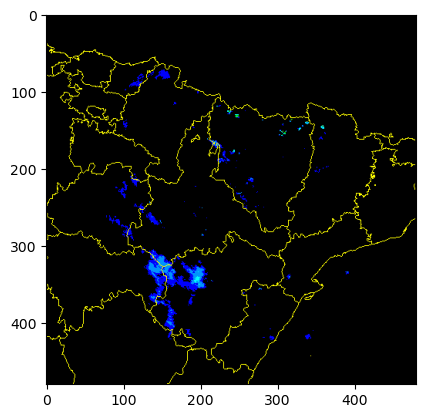

In [6]:
# Anular la circunferencia externa
pixel_externo = images[keys[0]][0,0]
pixel_vacio = np.array([  0,   0,   0, 255], dtype = np.uint8)
or_shape = images[keys[0]].shape

mask = (images[keys[0]].reshape([-1, 4]) == pixel_externo).prod(axis = 1)
for key in keys:
    aux = images[key].reshape([-1, 4]).copy()
    aux[mask == 1] = pixel_vacio
    images[key] = aux.reshape(or_shape)

plt.imshow(images[keys[0]])

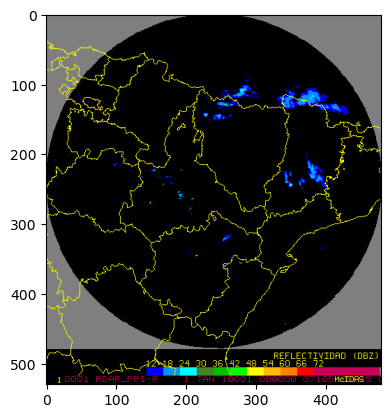

In [7]:
aux = plt.imread('D:\\Radar Zaragoza\Original\\20100101_0000.gif')
plt.imshow(aux)

In [8]:
# print(aux[510,300:400])

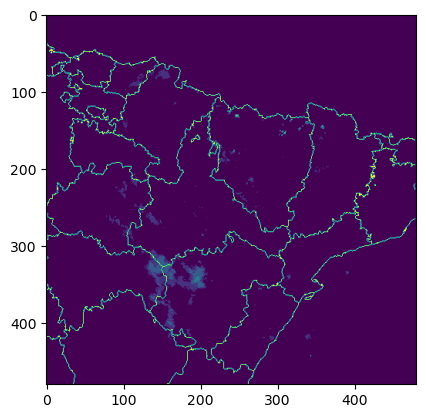

In [9]:
# Conversión de píxeles a escala de grises
# NOTA IMPORTANTE: El color de la frontera coincide con píxeles de radar (Amarillo)
pixel_frontera = np.array([255, 255,   0, 255], dtype = np.uint8)
intensity_list = [
    np.array([  0,   0,   0, 255], dtype = np.uint8), # Negro (0)
    np.array([  0,   0, 252, 255], dtype = np.uint8), # Azul oscuro (12)
    np.array([  0, 148, 252, 255], dtype = np.uint8), # Azul (16)
    np.array([  0, 252, 252, 255], dtype = np.uint8), # Azul claro (24)
    np.array([ 67, 131,  35, 255], dtype = np.uint8), # Verde oscuro (30)
    np.array([  0, 192,   0, 255], dtype = np.uint8), # Verde (36)
    np.array([  0, 255,   0, 255], dtype = np.uint8), # Verde claro (42)
    np.array([255, 255,   0, 255], dtype = np.uint8), # Amarillo (48)
    np.array([255, 187,   0, 255], dtype = np.uint8), # Dorado (54)
    np.array([255, 127,   0, 255], dtype = np.uint8), # Naranja (60)
    np.array([255,   0,   0, 255], dtype = np.uint8), # Rojo (66)
    np.array([200,   0,  90, 255], dtype = np.uint8), # Morado (72)
]

images_g = {}
new_shape = images[keys[0]].shape[:2]
for key in keys:
    aux = images[key].reshape([-1, 4])
    imagen_g = np.zeros(aux.shape[0])
    for i in range(len(intensity_list)):
        mask_i = (aux == intensity_list[i]).prod(axis = 1)
        imagen_g[mask_i == 1] = i
    images_g[key] = imagen_g.reshape(new_shape)

plt.imshow(images_g[keys[0]])

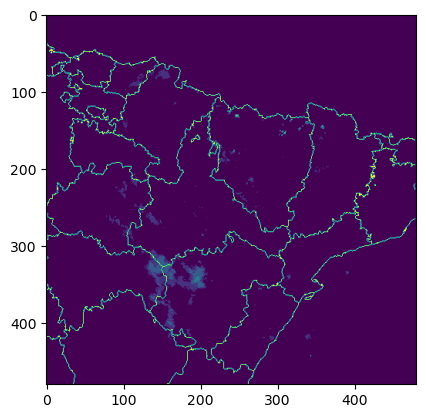

In [10]:
plt.imshow(images_g[keys[0]])

In [11]:
np.median(np.array([1,2,3,4]))

2.5

In [12]:
images_g[keys[0]][-2, 262]

7.0

In [13]:
# Lista de imágenes con las fronteras mal
bads = []
for key in keys:
    # Especificar manualmente coordenadas de algunos píxeles de las fronteras
    if(images_g[key][38,0] != 7.0 or images_g[key][292, 0] != 7.0 or images_g[key][-2, 262] != 7.0):
        bads.append(key)
bads

['20111118_0900.gif']

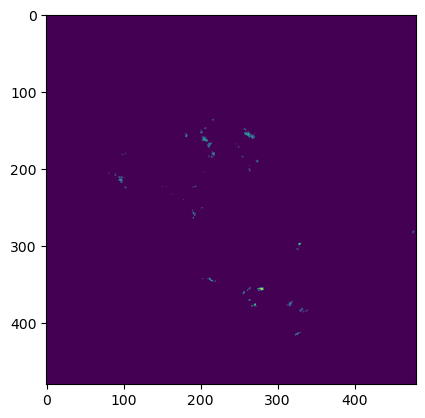

In [31]:
plt.imshow(images_g['20111118_0900.gif'])

In [32]:
# Se eliminan las imágenes incorrectas
for bad in bads:
    keys.remove(bad)
    images_g.pop(bad)

In [33]:
# aux = images_g.pop(bad)

In [36]:
# images_g['20111118_0900.gif'] = aux

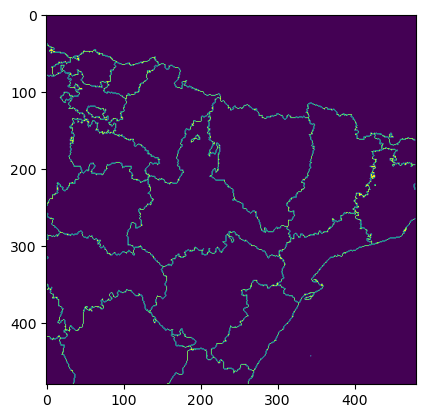

In [35]:
# Se marcan las coordenadas de las fronteras
img_frontera = np.array(list(images_g.values())).min(axis = 0) > 0
mask_frontera = img_frontera.reshape(-1)
coords_frontera = []
for i in range(img_frontera.shape[0]):
    for j in range(img_frontera.shape[1]):
        if img_frontera[i, j]:
            coords_frontera.append([i, j])
plt.imshow(img_frontera)

In [37]:
# Retirar las fronteras utilizando un filtro de mediana
amplitud = 5 # Amplitud de la ventana del filtro de mediana (impar)
for key in keys:
    img = images_g[key].reshape(-1).copy()
    img[mask_frontera] = 0
    img = img.reshape(images_g[key].shape)
    img2 = img.copy()
    for coord in coords_frontera:
        # filtro mediana
        values = []
        # Recorrido de ventadna
        for i in range(max(coord[0] - (amplitud // 2), 0), min(coord[0] + (amplitud // 2), img.shape[0])):
            for j in range(max(coord[1] - (amplitud // 2), 0), min(coord[1] + (amplitud // 2), img.shape[1])):
                if (img[i, j] > 0):
                    values.append(img[i, j])
        # Para valores no nulos se aplica la mediana (En caso de empate puede haber decimales)
        if (len(values) > 0):
            img2[coord[0], coord[1]] = np.median(np.array(values))
    images_g[key] = img2

In [39]:
# aux = '20100101_0000'.split('_')
# aux

In [40]:
# aux[0][:4] + '-' + aux[0][4:6] + '-' + aux[0][6:8] + '--' + aux[1][0:2] + '_' + aux[1][2:4]

In [38]:
# Exportar las imágenes
new_dir = 'D:\\Radar Zaragoza\Fix_Preprocessed'

formato = 'png'

for key in keys:
    split = key.split('.')[0].split('_')
    file = split[0][:4] + '-' + split[0][4:6] + '-' + split[0][6:8] + '--' + split[1][0:2] + '_' + split[1][2:4] + '.' + formato
    path = os.path.join(new_dir, file)
    cv2.imwrite(path, images_g[key] * (255/11))# 11 es el número de tipos de intensidad

In [17]:
aux = plt.imread('D:\\Radar Zaragoza\\Preprocessed\\2010-01-01--00_00.png')
aux

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
aux.shape

(480, 480)

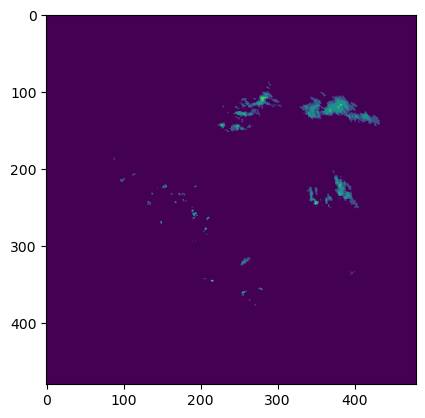

In [181]:
plt.imshow(aux)

In [171]:
images_g[keys[0]].max()

4.0

In [177]:
aux.max() * 11

4.011764794588089

In [109]:
4.0 / 0.015686275

254.99999203125026

In [182]:
255/11

23.181818181818183